# Results of Global search 
## Synthetic 3 Layer case

In [1]:
%matplotlib widget

In [2]:
# Import libraries
#import empymod
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import pandas as pd
import pygimli as pg

import sys
sys.path.insert(1, '../../src')

from PlotModel import PlotModelCond_3lay, PlotErrorSpace, PlotData, rmse_a
from EM1D import EMforward3lay

### Show Model

In [3]:
# Import the conductivities and thicknesses used to create the LU table

conds = np.load('../data/conds.npy')
thick = np.load('../data/thicks.npy')

model_true = np.load('../data/B1_w/model_synth_w.npy')
model_est_FS = np.load('../data/B1_w/model_est_FS_w.npy')
model_est_FS_Q = np.load('../data/B1_Q_w/model_est_FS_B1_Q_w.npy')
model_est_FS_IP =  np.load('../data/B1_IP_w/model_est_FS_B1_IP_w.npy')
model_est_GSOpt = np.load('../data/B1_w/model_est_GSOpt_3.npy')

data_true =  np.load('../data/B1_w/data_synth_w.npy')

# Load with noise
model_est_FS_noise2 = np.load('../data/B1_noise2_w/model_est_FS_B1_noise2_w.npy')
model_est_FS_noise5 = np.load('../data/B1_noise5_w/model_est_FS_B1_noise5_w.npy')
model_est_FS_noise10 = np.load('../data/B1_noise10_w/model_est_FS_B1_noise10_w.npy')

data_true_noise2 = np.load('../data/B1_noise2_w/data_synth_noise2_w.npy')
data_true_noise5 = np.load('../data/B1_noise5_w/data_synth_noise5_w.npy')
data_true_noise10 =  np.load('../data/B1_noise10_w/data_synth_noise10_w.npy')

npos = len(model_true)
nlayer = 3

depths_true = np.zeros((npos, nlayer))
sigmas_true = np.zeros((npos, nlayer))

depths_true[:,1] = model_true[:,3]
depths_true[:,2] = model_true[:,3] + model_true[:,4]
sigmas_true[:,:] = model_true[:,:3]

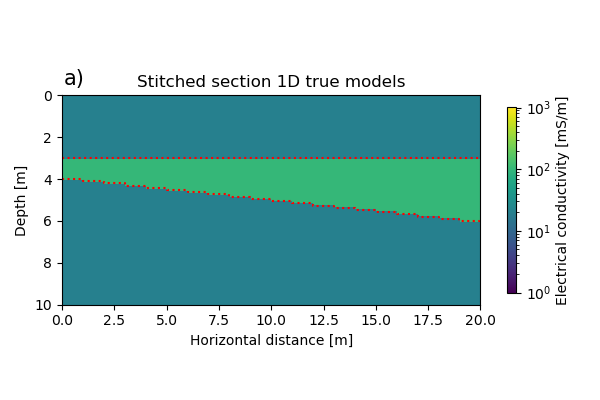

In [4]:
model_true_grid = PlotModelCond_3lay(sigmas_true, depths_true[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Stitched section 1D true models')
plt.text(0.1,-0.5,'a)', color='k',fontsize=15)
plt.tight_layout()

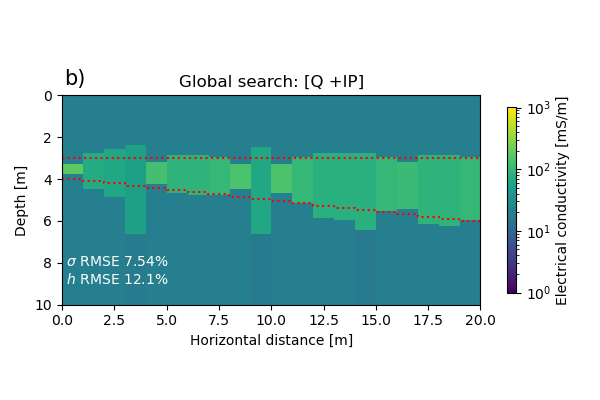

In [5]:
depths_est_FS = np.zeros_like(depths_true)
sigmas_est_FS = np.zeros_like(sigmas_true)

depths_est_FS[:,1] = model_est_FS[:,3]
depths_est_FS[:,2] = model_est_FS[:,3] + model_est_FS[:,4]
sigmas_est_FS[:,:] = model_est_FS[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid = PlotModelCond_3lay(sigmas_est_FS, depths_est_FS[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [Q +IP]')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'b)', color='k',fontsize=15)
plt.tight_layout()

Text(0, 0.5, 'Depth [m]')

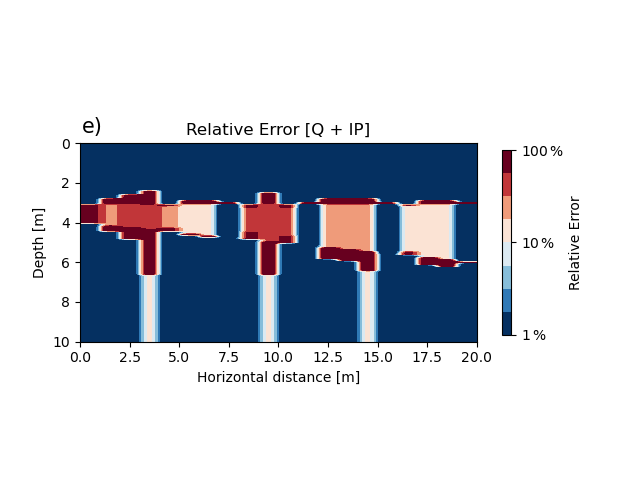

In [6]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q + IP]')
plt.text(0.1,-0.5,'e)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

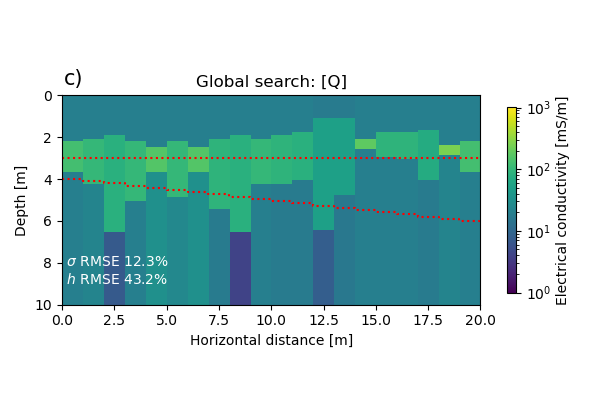

In [7]:
depths_est_FS_Q = np.zeros_like(depths_true)
sigmas_est_FS_Q = np.zeros_like(sigmas_true)

depths_est_FS_Q[:,1] = model_est_FS_Q[:,3]
depths_est_FS_Q[:,2] = model_est_FS_Q[:,3] + model_est_FS_Q[:,4]
sigmas_est_FS_Q[:,:] = model_est_FS_Q[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS_Q)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS_Q[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_Q= PlotModelCond_3lay(sigmas_est_FS_Q, depths_est_FS_Q[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [Q]')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'c)', color='k',fontsize=15)
plt.tight_layout()

Text(0, 0.5, 'Depth [m]')

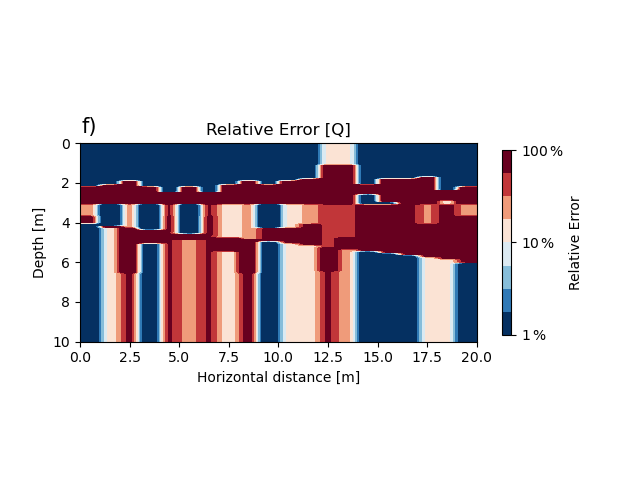

In [8]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_Q)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q]')
plt.text(0.1,-0.5,'f)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

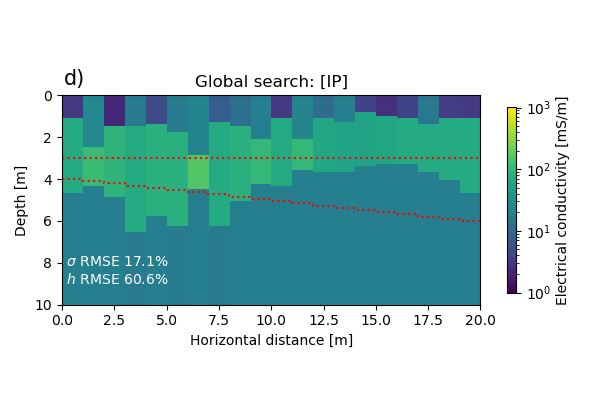

In [9]:
depths_est_FS_IP = np.zeros_like(depths_true)
sigmas_est_FS_IP = np.zeros_like(sigmas_true)

depths_est_FS_IP[:,1] = model_est_FS_IP[:,3]
depths_est_FS_IP[:,2] = model_est_FS_IP[:,3] + model_est_FS_IP[:,4]
sigmas_est_FS_IP[:,:] = model_est_FS_IP[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS_IP)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS_IP[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_IP = PlotModelCond_3lay(sigmas_est_FS_IP, depths_est_FS_IP[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [IP]')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'d)', color='k',fontsize=15)
plt.tight_layout()

Text(0, 0.5, 'Depth [m]')

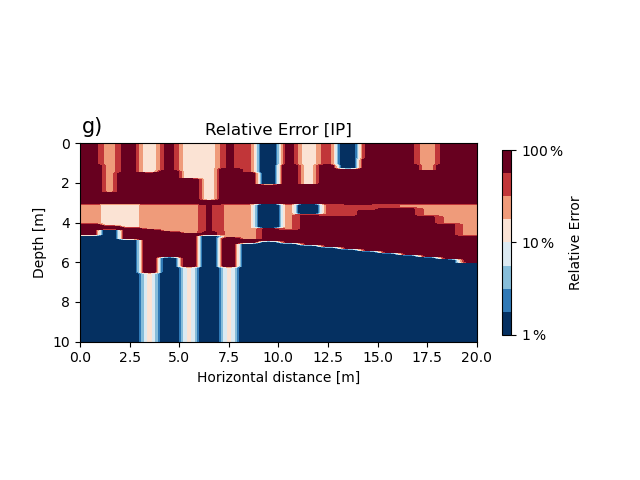

In [10]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_IP)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [IP]')
plt.text(0.1,-0.5,'g)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

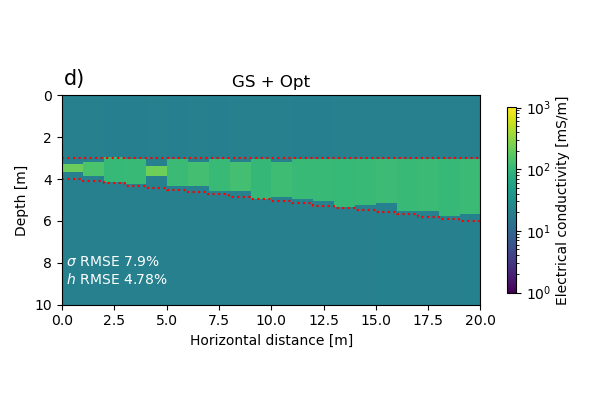

In [22]:
depths_est_GSO = np.zeros_like(depths_true)
sigmas_est_GSO = np.zeros_like(sigmas_true)

depths_est_GSO[:,1] = model_est_GSOpt[:,3]
depths_est_GSO[:,2] = model_est_GSOpt[:,3] + model_est_GSOpt[:,4]
sigmas_est_GSO[:,:] = model_est_GSOpt[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_GSO)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_GSO[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_GSO = PlotModelCond_3lay(sigmas_est_GSO, depths_est_GSO[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('GS + Opt')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'d)', color='k',fontsize=15)
plt.tight_layout()

Text(0, 0.5, 'Depth [m]')

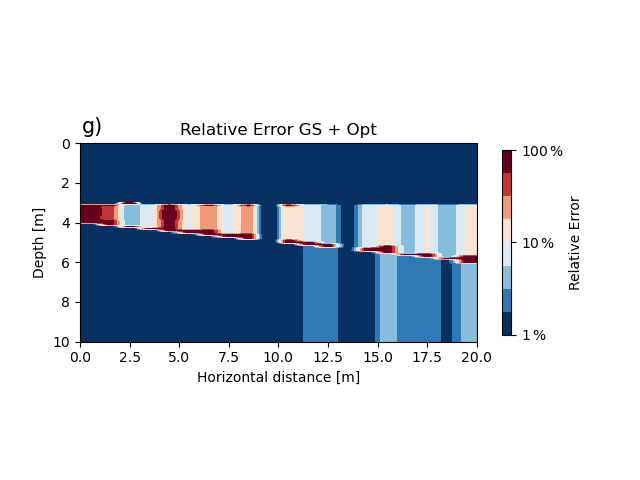

In [23]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_GSO)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error GS + Opt')
plt.text(0.1,-0.5,'g)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

## Test minimization scheme

In [19]:
# Create forward modeller class

class EMforward_3lay(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        if (thk1+thk2) >= 10:
            thk1 = 2
            thk2 = 3
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z               
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [20]:
# Initialize the forward modelling class
EMf_3lay = EMforward_3lay()

In [21]:
# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0]) * error

NameError: name 'data_true' is not defined

In [22]:
# Define inversion transformations

transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay)

invEM.transModel = transModel
invEM.transData = transData

In [ ]:
# Start inversion

model_est = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est[pos] = model_est_pos

In [ ]:
depths_est = np.zeros_like(depths_true)
sigmas_est = np.zeros_like(sigmas_true)
depths_est[:,1] = model_est[:,3]
depths_est[:,2] = model_est[:,3] + model_est[:,4]
sigmas_est[:,:] = model_est[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_Opt = PlotModelCond_3lay(sigmas_est, depths_est[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')

plt.title('Optimization: [Q + IP]')
plt.text(0.1,-0.5,'h)', color='k',fontsize=15)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_Opt)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q + IP]')
plt.text(0.1,-0.5,'k)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

In [ ]:
# Create forward modeller class

class EMforward_3lay_Q(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        if (thk1+thk2) >= 10:
            thk1 = 2
            thk2 = 3
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z[:9]
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [ ]:
# Initialize the forward modelling class
EMf_3lay_Q = EMforward_3lay_Q()

# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0,:9]) * error

# Define inversion transformations
transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay_Q)

invEM.transModel = transModel
invEM.transData = transData

# Start inversion
model_est_Q = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos,:9].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est_Q[pos] = model_est_pos

In [ ]:
depths_est_Q = np.zeros_like(depths_true)
sigmas_est_Q = np.zeros_like(sigmas_true)
depths_est_Q[:,1] = model_est_Q[:,3]
depths_est_Q[:,2] = model_est_Q[:,3] + model_est_Q[:,4]
sigmas_est_Q[:,:] = model_est_Q[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_Q)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_Q[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_Opt_Q = PlotModelCond_3lay(sigmas_est_Q, depths_est_Q[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'i)', color='k',fontsize=15)
plt.title('Optimization: [Q]')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_Opt_Q)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q]')
plt.text(0.1,-0.5,'l)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

In [ ]:
# Create forward modeller class

class EMforward_3lay_IP(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        if (thk1+thk2) >= 10:
            thk1 = 2
            thk2 = 3
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z[9:]
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [ ]:
# Initialize the forward modelling class
EMf_3lay_IP = EMforward_3lay_IP()

# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0,9:]) * error

# Define inversion transformations
transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay_IP)

invEM.transModel = transModel
invEM.transData = transData

# Start inversion
model_est_IP = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos,9:].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est_IP[pos] = model_est_pos

In [ ]:
depths_est_IP = np.zeros_like(depths_true)
sigmas_est_IP = np.zeros_like(sigmas_true)
depths_est_IP[:,1] = model_est_IP[:,3]
depths_est_IP[:,2] = model_est_IP[:,3] + model_est_IP[:,4]
sigmas_est_IP[:,:] = model_est_IP[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_IP)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_IP[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_Opt_IP = PlotModelCond_3lay(sigmas_est_IP, depths_est_IP[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'j)', color='k',fontsize=15)
plt.title('Optimization: [IP]')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_Opt_IP)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [IP]')
plt.text(0.1,-0.5,'m)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

### Noise

In [ ]:
depths_est_FS_noise2 = np.zeros_like(depths_true)
sigmas_est_FS_noise2 = np.zeros_like(sigmas_true)

depths_est_FS_noise2[:,1] = model_est_FS_noise2[:,3]
depths_est_FS_noise2[:,2] = model_est_FS_noise2[:,3] + model_est_FS_noise2[:,4]
sigmas_est_FS_noise2[:,:] = model_est_FS_noise2[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS_noise2)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS_noise2[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_noise2 = PlotModelCond_3lay(sigmas_est_FS_noise2, depths_est_FS_noise2[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [Q + IP], noise: 2.5%')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'a)', color='k',fontsize=15)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_noise2)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q + IP], noise: 2.5%')
plt.text(0.1,-0.5,'d)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

In [ ]:
depths_est_FS_noise5 = np.zeros_like(depths_true)
sigmas_est_FS_noise5 = np.zeros_like(sigmas_true)

depths_est_FS_noise5[:,1] = model_est_FS_noise5[:,3]
depths_est_FS_noise5[:,2] = model_est_FS_noise5[:,3] + model_est_FS_noise5[:,4]
sigmas_est_FS_noise5[:,:] = model_est_FS_noise5[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS_noise5)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS_noise5[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_noise5 = PlotModelCond_3lay(sigmas_est_FS_noise5, depths_est_FS_noise5[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [Q + IP], noise: 5%')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'b)', color='k',fontsize=15)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_noise5)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q + IP], noise: 5%')
plt.text(0.1,-0.5,'e)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

In [ ]:
depths_est_FS_noise10 = np.zeros_like(depths_true)
sigmas_est_FS_noise10 = np.zeros_like(sigmas_true)

depths_est_FS_noise10[:,1] = model_est_FS_noise10[:,3]
depths_est_FS_noise10[:,2] = model_est_FS_noise10[:,3] + model_est_FS_noise10[:,4]
sigmas_est_FS_noise10[:,:] = model_est_FS_noise10[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_FS_noise10)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_FS_noise10[:,1:]), np.hstack(depths_true[:,1:]))

model_est_grid_noise10 = PlotModelCond_3lay(sigmas_est_FS_noise10, depths_est_FS_noise5[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('Global search: [Q + IP], noise: 10%')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')
plt.text(0.1,-0.5,'c)', color='k',fontsize=15)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

error_est = np.abs((model_true_grid-model_est_grid_noise10)/model_true_grid)*100+0.1
cf = ax.imshow(np.log10(error_est).T, extent=[0,npos,10,0], vmin=0, vmax=2,
          cmap=plt.cm.get_cmap("RdBu_r", 8))
cbar = fig.colorbar(cf, ax=ax, label=r"Relative Error",  shrink=0.5)
cbar.set_ticks([0, 1, 2])
cbar.ax.set_yticklabels([ r"$1\,\%$",
                         r"$10\,\%$", r"$100\,\%$"])
plt.title('Relative Error [Q + IP], noise: 10%')
plt.text(0.1,-0.5,'f)', color='k',fontsize=15)
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Depth [m]')

## See Error Space

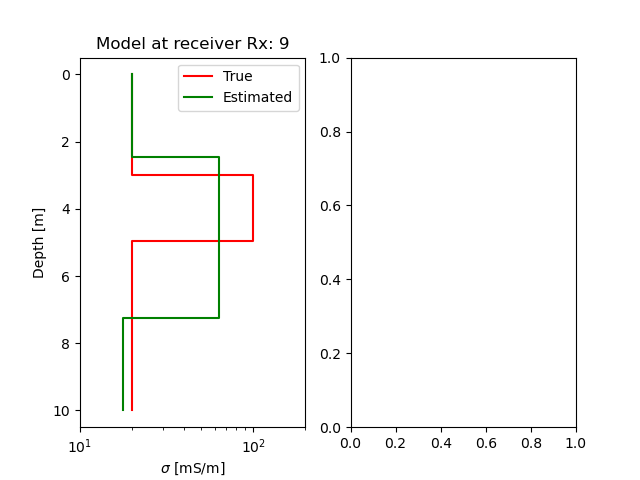

In [149]:
pos=9
depthmax=10

depth_true = np.array([0, model_true[pos,3], model_true[pos,3]+model_true[pos,4],depthmax])
depth_est = np.array([0, model_est_FS[pos,3], model_true[pos,3]+model_est_FS[pos,4], depthmax])

sigma_true = np.hstack([model_true[pos,:3], model_true[pos,2]])
sigma_est = np.hstack([model_est_FS[pos,:3], model_est_FS[pos,2]])

fig, ax = plt.subplots(1,2)

ax[0].step(sigma_true*1000, depth_true, 'r', label = 'True')
ax[0].step(sigma_est*1000, depth_est, 'g', label='Estimated')
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('$\sigma$ [mS/m]')
ax[0].set_title('Model at receiver Rx: ' +str(pos))
ax[0].set_xlim([10,200])
ax[0].set_xscale('log')
ax[0].legend()

In [155]:
def ErrorSpace3Lay(m_est_pos, data_true_pos, conds, thicks, max_err=0.1):
    # Evaluate only conductivity and thickness of middle layer
    err = []
    models_below_err = []
    
    for c2 in conds:
        for t1 in thicks: 
            for t2 in thicks:
                m = [m_est_pos[0], c2, m_est_pos[2], t1, t2]
                data_est_pos = EMforward3lay(m_est_pos[0], c2, m_est_pos[2], t1, t2, height=0.47) 
                diff = np.abs((data_true_pos - data_est_pos)/data_true_pos)
                merr = np.sum(diff)/len(data_true_pos)

                if merr < max_err:
                    err.append(merr)       
                    models_below_err.append(m)
    
    return models_below_err, err

In [156]:
m_est_pos = model_est_FS[pos]
data_true_pos = data_true[pos]

In [172]:
models_below_err, error = ErrorSpace3Lay(m_est_pos, data_true_pos, conds, thick, max_err=0.05)

In [173]:
models_below_err = np.array(models_below_err)
error = np.array(error)

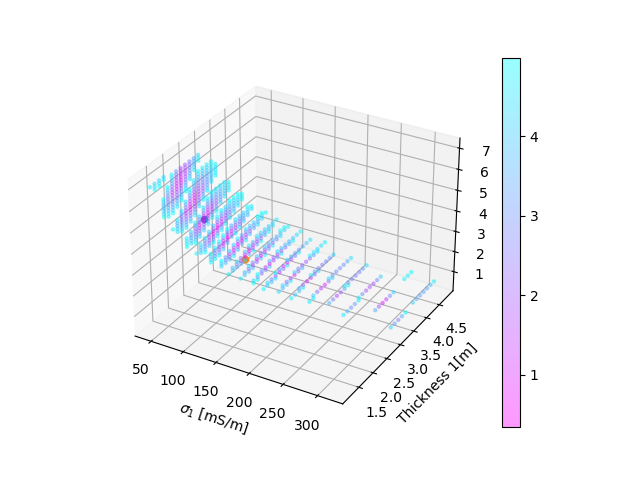

In [177]:
conds2_b1 = models_below_err[:,1]
thicks_b1 = models_below_err[:,3]
thicks_b2 = models_below_err[:,4]

fig = plt.figure()

ax3D = fig.add_subplot(111, projection='3d')
p = ax3D.scatter(((conds2_b1)*1000), thicks_b1, thicks_b2,
                 s=5, c=error*100, marker='o', cmap='cool_r', alpha=0.4)
ax3D.scatter(model_est_FS[pos,1]*1000, model_est_FS[pos,3], model_est_FS[pos,4])
ax3D.scatter(model_true[pos,1]*1000, model_true[pos,3], model_true[pos,4])
ax3D.set_xlabel('$\sigma_1$ [mS/m]')
ax3D.set_ylabel('Thickness 1[m]')
ax3D.set_zlabel('Thickness 2[m]')
clb = fig.colorbar(p, ax=ax3D)

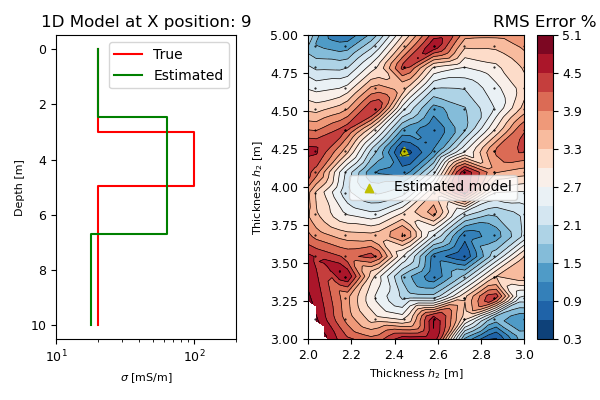

In [184]:
# Error space using Q + IP
import matplotlib.tri as tri

def PlotErrorSpace(model, model_est, pos, err, models_err, depthmax=10):
    
    # Arrays to plot
    depth_true = np.array([0, model[pos,3], model[pos,3]+model[pos,4], depthmax])
    depth_est = np.array([0, model_est[pos,3], model_est[pos,3]+model_est[pos,4], depthmax])

    sigma_true = np.hstack([model[pos,:3], model[pos,2]])
    sigma_est = np.hstack([model_est[pos,:3], model_est[pos,2]])
       
    fig, ax = plt.subplots(1,2, figsize=(6,4), gridspec_kw={'width_ratios': [1,1.5]})
    
    ax[0].step(sigma_true*1000, depth_true, 'r', label = 'True')
    ax[0].step(sigma_est*1000, depth_est, 'g', label='Estimated')
    ax[0].invert_yaxis()
    ax[0].set_ylabel('Depth [m]', fontsize=8)
    ax[0].set_xlabel('$\sigma$ [mS/m]', fontsize=8)
    ax[0].set_title('1D Model at X position: ' +str(pos))
    ax[0].set_xscale('log')
    ax[0].set_xlim([10,200])
    ax[0].legend()

    x = models_err[:,3] # thickness of first layer
    y = models_err[:,4] # thickness of second layer
    z = err

    ngridx = 100
    ngridy = 200
    
    # Create grid values first.
    xi = np.linspace(np.min(x), np.max(x), ngridx)
    yi = np.linspace(np.min(y), np.max(y), ngridy)

    # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    
    # Note that scipy.interpolate provides means to interpolate data on a grid
    # as well. The following would be an alternative to the four lines above:
    # from scipy.interpolate import griddata
    # zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

    ax[1].contour(xi, yi, zi*100, levels=14, linewidths=0.5, colors='k')
    cntr1 = ax[1].contourf(xi, yi, zi*100, levels=14, cmap="RdBu_r")
    ax[1].plot(x, y, '.k', ms=1)
    ax[1].set(xlim=(2,3), ylim=(3,5))
    ax[1].scatter(model_est[pos,3], model_est[pos,4],
                 marker ='^', c='y', label='Estimated model')
    #ax1.scatter( np.log10((model_cm_pos[1])*1000), model_cm_pos[2],
    #             marker ='^', c='k', label='Closest')
    ax[1].set_xlabel('Thickness $h_2$ [m]', fontsize=8)
    ax[1].set_ylabel('Thickness $h_2$ [m]', fontsize=8)
    #ax[1].set_xscale('log')
    ax[1].legend()
    ax[1].tick_params(axis='both',labelsize=9)
    ax[0].tick_params(axis='both',labelsize=9)
    clb = fig.colorbar(cntr1, ax=ax[1])
    clb.ax.set_title('RMS Error %')
    clb.ax.tick_params(labelsize=9)

PlotErrorSpace(model_true, model_est_FS, pos, error, models_below_err)
plt.tight_layout()
plt.show()

In [195]:
models_below_err_5, error_5 = ErrorSpace3Lay(m_est_pos, data_true_pos, conds, thick, max_err=0.05)

In [196]:
models_below_err_5 = np.array(models_below_err_5)
error_5 = np.array(error_5)

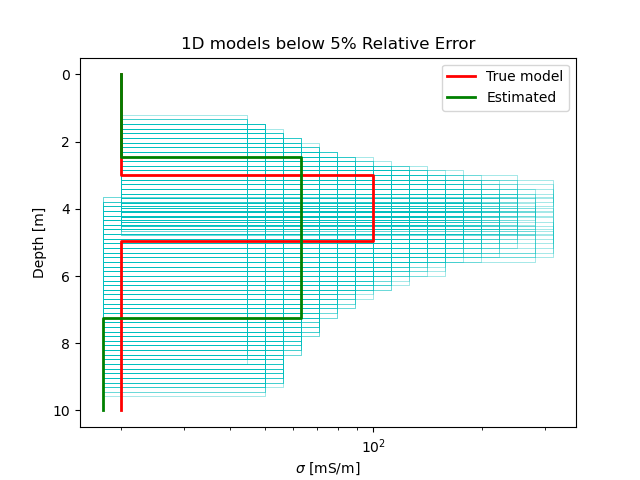

In [197]:
fig, ax = plt.subplots()

for m in range(len(models_below_err_5)):
    # Arrays to plot
    depth_est_b = np.array([0, models_below_err_5[m,3], models_below_err_5[m,3]+models_below_err_5[m,4], depthmax])
    sigma_est_b = np.hstack([models_below_err_5[m,:3], models_below_err_5[m,2]])

    ax.step(sigma_est_b*1000, depth_est_b, 'c', alpha=0.5, linewidth=0.5)
ax.step(sigma_true*1000, depth_true, 'r', label = 'True model', linewidth=2)
ax.step(sigma_est*1000, depth_est, 'g', label='Estimated', linewidth=2)
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$\sigma$ [mS/m]')
ax.set_xscale('log')
#ax.set_xlim([15, 500])
ax.legend()
ax.set_title('1D models below 5% Relative Error')
               
plt.show()